<div style = "text-align:center">

# EDA Com pandas
</div>



In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis



### Carregamento do Dataset

In [3]:
# Carregar o dataset
df = pd.read_csv("evasao.csv")

# Verificar o número de linhas e colunas
print("Número de linhas e colunas:", df.shape , "\n")

pd.DataFrame(df)

Número de linhas e colunas: (11555, 15) 



,campus,curso,sexo,dataNascimento,estadoCivil,ocorrenciaDescricao,periodo,endereco,municipio,bairro,cep,uf,anoNascimento,anoIngresso,anoEvasao
0,CAMPUS CUIABÁ,ENGENHARIA CIVIL - SERIADO,M,1987-04-23 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,RUA CURSINO DO AMARANTE 1022,CUIABA,QUILOMBO,78045070,MT,1987.0,2008.0,2020
1,CAMPUS CUIABÁ,BACHARELADO EM CIÊNCIAS SOCIAIS,M,1992-04-16 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,"Rua A, n250",CUIABA,Bairro Residencial Paiaguas,78048258,MT,1992.0,2010.0,2020
2,CAMPUS CUIABÁ,ENGENHARIA SANITARIA E AMBIENTAL - SERIADO SEM,F,1990-10-10 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,RUA AMÂNCIO PEDROSO DE JESUS ...,CUIABA,CARUMBÉ,78050660,MT,1990.0,2009.0,2020
3,CAMPUS CUIABÁ,GEOLOGIA - SERIADO,M,1982-09-30 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,TRAVESSA AGUA CLARA - 119,AQUIDAUANA,COHAB NOVA,78025433,MS,1982.0,2010.0,2020
4,CAMPUS CUIABÁ,DIREITO - SERIADO MATUTINO,F,1992-01-10 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20201,"RUA I, N 91, CS 03, RES GOLDEN VILLE",CUIABA,ALVORADA,78048487,MT,1992.0,2010.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,CAMPUS SINOP,MEDICINA VETERINÁRIA - BACHARELADO,F,2005-09-30 00:00:00.000,Solteiro(a),EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO,20241,"Avenida Curuá-Una, 7055",SANTAREM,Jutaí,68045000,PA,2005.0,2024.0,2024
11551,CAMPUS SINOP,ZOOTECNIA - BACHARELADO,F,2002-05-15 00:00:00.000,Solteiro(a),EXCLUSAO POR DESISTENCIA,20241,"Rua Vinte e Quatro, 174",BETIM,Capelinha,32678270,MG,2002.0,2024.0,2024
11552,CAMPUS SINOP,ENGENHARIA AGRÍCOLA E AMBIENTAL BACHARELADO,F,2003-03-28 00:00:00.000,Solteiro(a),EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO,20241,"Rua G-1, 367",CUIABA,Residencial Nova Canaã,78052860,MT,2003.0,2024.0,2024
11553,CAMPUS SINOP,QUÍMICA - BACHARELADO,M,1980-11-01 00:00:00.000,Solteiro(a),EXCLUSAO CONFORME EDITAL SISU - PELA INSTITUIÇÃO,20241,"Rua Ary Barroso, 218",SINOP,Aquarela Brasil Residencial,78556554,MT,1980.0,2024.0,2024


### Informações gerais sobre o dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campus               11555 non-null  object 
 1   curso                11555 non-null  object 
 2   sexo                 11555 non-null  object 
 3   dataNascimento       11554 non-null  object 
 4   estadoCivil          11555 non-null  object 
 5   ocorrenciaDescricao  11555 non-null  object 
 6   periodo              11555 non-null  int64  
 7   endereco             11555 non-null  object 
 8   municipio            11550 non-null  object 
 9   bairro               11555 non-null  object 
 10  cep                  11519 non-null  object 
 11  uf                   11550 non-null  object 
 12  anoNascimento        11554 non-null  float64
 13  anoIngresso          11552 non-null  float64
 14  anoEvasao            11555 non-null  int64  
dtypes: float64(2), int64(2), object(11)


In [5]:
#Verifica a quantidade de valores únicos por coluna 
df.nunique()

campus                     4
curso                    148
sexo                       2
dataNascimento          6065
estadoCivil                3
ocorrenciaDescricao       19
periodo                    9
endereco               10887
municipio                632
bairro                  3729
cep                     5168
uf                        27
anoNascimento             65
anoIngresso               24
anoEvasao                  5
dtype: int64

<div style = 'color: red;'> 

#### Observação: 

</div>
Para este dataset, as variáveis numéricas úteis são:anoNascimento, anoIngresso, anoEvasao. Logo irei criar a idade dos alunos no ano de ingresso e no ano de evasão




#### Conversão de colunas de data e criação de variáveis úteis

In [6]:
# Convertendo data de nascimento para datetime
df['dataNascimento'] = pd.to_datetime(df['dataNascimento'], errors='coerce')

In [9]:
# Cria a idade do aluno no ano de evasão 
df['idade_evasao'] = df['anoEvasao'] - df['dataNascimento'].dt.year


In [21]:
# Cálculo da idade no ano de ingresso
df['idade_ingresso'] = df['anoIngresso'] - df['dataNascimento'].dt.year

### Medidas de tendência central (idade)

#### Idade no Ingresso

In [22]:
print("\nMedidas de Tendência Central - Idade no Ingresso:\n")
print("Média:", df['idade_ingresso'].mean())
print("Mediana:", df['idade_ingresso'].median())
print("Moda:", df['idade_ingresso'].mode()[0])



Medidas de Tendência Central - Idade no Ingresso:

Média: 23.466279975759676
Mediana: 20.0
Moda: 19.0


#### Idade na evasão

In [ ]:
print("\nMedidas de Tendência Central - Idade na Evasão:\n")
print("Média:", df['idade_evasao'].mean())
print("Mediana:", df['idade_evasao'].median())
print("Moda:", df['idade_evasao'].mode()[0])



Medidas de Tendência Central - Idade na Evasão:

Média: 27.40643932837113
Mediana: 25.0
Moda: 20.0


### Medidas de dispersão (idade)

#### Idade no Ingresso

In [23]:
print("\nMedidas de Dispersão - Idade no Ingresso:\n")
print("Desvio padrão:", df['idade_ingresso'].std())
print("Variância:", df['idade_ingresso'].var())
print("Amplitude:", df['idade_ingresso'].max() - df['idade_ingresso'].min())



Medidas de Dispersão - Idade no Ingresso:

Desvio padrão: 7.680021960931796
Variância: 58.98273732039467
Amplitude: 72.0


#### Idade na evasão

In [ ]:
print("Desvio padrão:", df['idade_evasao'].std())
print("Variância:", df['idade_evasao'].var())
print("Amplitude:", df['idade_evasao'].max() - df['idade_evasao'].min())

Desvio padrão: 8.654356895057399
Variância: 74.89789326702754
Amplitude: 79.0


### Medidas de forma (idade)

#### Assimetria

##### Idade no Ingresso

In [ ]:
print("Assimetria (Skewness):", skew(df['idade_ingresso'].dropna()))

Assimetria (Skewness): 2.1238382287664317


##### Idade na evasão

In [ ]:
print("Assimetria (Skewness):", skew(df['idade_evasao'].dropna()))

Assimetria (Skewness): 1.5907306499442602


#### Curtose

##### Idade no Ingresso

In [ ]:
print("Curtose (Kurtosis):", kurtosis(df['idade_ingresso'].dropna()))

##### Idade na Evasão

In [13]:
print("Curtose (Kurtosis):", kurtosis(df['idade_evasao'].dropna()))

Curtose (Kurtosis): 2.950641791152405


### Quartis, IQR e detecção de outliers

### Idade no Ingresso

In [25]:
# Cálculo dos quartis e IQR
Q1 = df['idade_ingresso'].quantile(0.25)
Q3 = df['idade_ingresso'].quantile(0.75)
IQR = Q3 - Q1

# Limites para definir outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando outliers
outliers = df[(df['idade_ingresso'] < limite_inferior) | (df['idade_ingresso'] > limite_superior)]

# Resultado
print("\nQuartis:")
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print(f"Outliers encontrados: {len(outliers)}")



Quartis:
Q1: 19.0
Q3: 25.0
IQR: 6.0
Outliers encontrados: 1162


### Idade na Evasão

In [16]:
Q1 = df['idade_evasao'].quantile(0.25)
Q3 = df['idade_evasao'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['idade_evasao'] < limite_inferior) | (df['idade_evasao'] > limite_superior)]
print("\nQuartis:")
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print(f'Outliers encontrados: {len(outliers)}')



Quartis:
Q1: 21.0
Q3: 31.0
IQR: 10.0
Outliers encontrados: 520


### Visualizações

#### Histograma da idade no ingresso

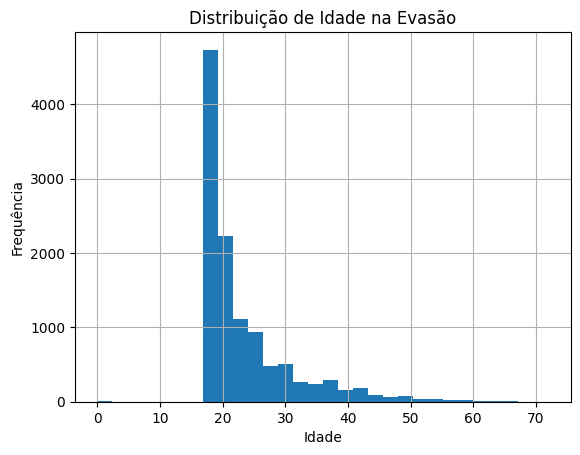

In [26]:
df['idade_ingresso'].hist(bins=30)
plt.title('Distribuição de Idade na Evasão')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#### Histograma da idade na evasão

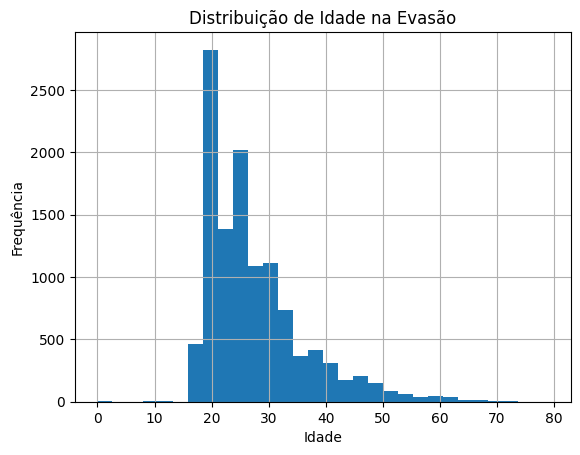

In [17]:
df['idade_evasao'].hist(bins=30)
plt.title('Distribuição de Idade na Evasão')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#### Boxplot da idade no Ingresso

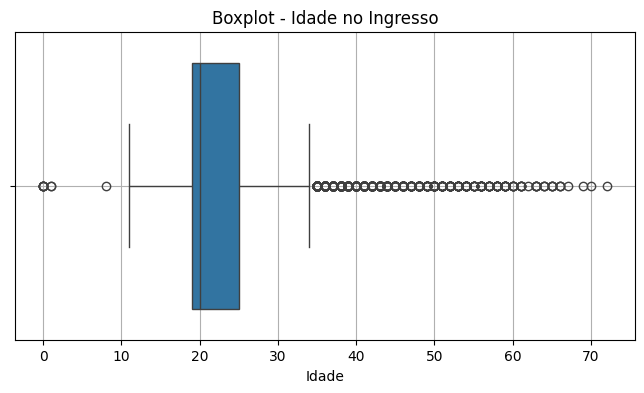

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['idade_ingresso'])
plt.title("Boxplot - Idade no Ingresso")
plt.xlabel("Idade")
plt.grid(True)
plt.show()

#### Boxplot da idade na Evasão

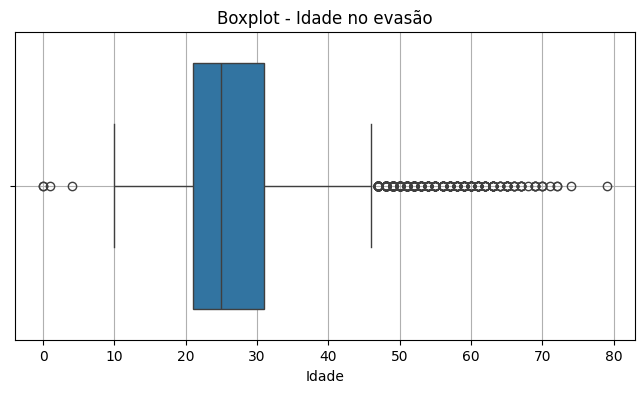

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['idade_evasao'])
plt.title("Boxplot - Idade no evasão")
plt.xlabel("Idade")
plt.grid(True)
plt.show()